In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))
pd.set_option("display.max_colwidth", None)
pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", None)
pd.options.display.float_format = '{:,.2f}'.format

In [2]:
feature_names=pd.read_csv('feature-mapping.csv')
df = pd.read_csv('4year.csv')

C:\Users\Oshan\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3146: DtypeWarning: Columns (0,1,2,5,6,7,9,10,13,14,15,16,17,21,23,24,25,28,33,34,35,37,47,49,50,56,58) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [60]:
columnList=feature_names.values.tolist()
column=[]
for item in columnList:
    column.append(item[0])

In [90]:
df.columns=column

In [78]:


for item in df.columns:
    df[item]=df[item].astype('str')
    df[item]=df[item].apply(lambda x: x.replace('?', '0')).astype('float')

In [80]:
from sklearn.feature_selection import f_classif

feature_cols = [col for col in df.columns if col != "bankrupt_label"]
X = df[feature_cols]
y = df["bankrupt_label"]

#fill missing values with zero
F, pval = f_classif(X.fillna(0), y)

pval_series = pd.Series(pval, index=X.columns)
pval_threshold = 0.01
top_features = pval_series[pval_series<pval_threshold].sort_values()
print(f"There are {len(top_features)} features with p-value less than {pval_threshold}: \n{top_features}")

There are 14 features with p-value less than 0.01: 
net profit / total assets                                                  0.00
profit on sales / total assets                                             0.00
logarithm of total assets                                                  0.00
(gross profit + interest) / total assets                                   0.00
EBIT / total assets                                                        0.00
(gross profit + extraordinary items + financial expenses) / total assets   0.00
profit on operating activities / total assets                              0.00
(sales - cost of products sold) / sales                                    0.00
profit on sales / sales                                                    0.00
gross profit / total assets                                                0.00
gross profit / short-term liabilities                                      0.00
(net profit + depreciation) / total liabilities                     

In [81]:
feature_cols = [col for col in df.columns if col not in ("bankrupt_label", "index")]

X = df[feature_cols]
X.shape

(9792, 64)

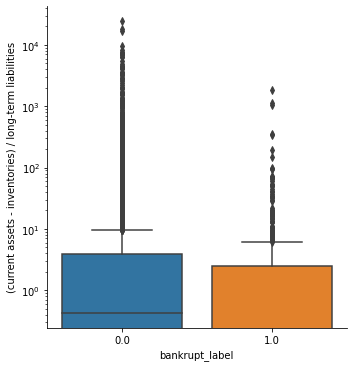

In [100]:
g = sns.catplot(data=df, x="bankrupt_label", y='(current assets - inventories) / long-term liabilities', kind="box")
g.ax.set_yscale('log')

In [101]:
col = '(current assets - inventories) / long-term liabilities' 
X[col].fillna(X[col].max(), inplace=True)

C:\Users\Oshan\anaconda3\lib\site-packages\pandas\core\series.py:4517: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().fillna(


In [104]:
more_than_10_missing = df[df.isnull().sum(axis=1) > 10]
print(f"There are {len(more_than_10_missing)} rows with more than 10 missing values")

more_than_10_missing[""].value_counts()

<ipython-input-104-1857a87031f9>:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  more_than_10_missing = df[df.count(0.00) > 10]


IndexingError: Unalignable boolean Series provided as indexer (index of the boolean Series and of the indexed object do not match).